### Decision Tree Methods

In [3]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix

2. Import Carseats dataset

In [5]:
Carseats = pd.read_csv('Carseats.csv')

In [6]:
Carseats.shape

(400, 11)

In [7]:
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
Carseats.head(400)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


3. We intend to classify the sales of carseats into high or low categories.<br>
First, we need to transform the numeric 'Sales' into high/low categories.

In [9]:
# The variable we create will be our y.
Carseats['Sales_c'] = pd.cut(Carseats['Sales'], bins = [-1, Carseats['Sales'].mean(), float('inf')], labels = ['low', 'high'])

In [10]:
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_c
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [11]:
Carseats['Sales_c'].value_counts()

low     201
high    199
Name: Sales_c, dtype: int64

4. Prepare X and y

In [26]:
# Drop the dependent variable from Carseats to get X
X = Carseats.drop(['Sales', 'Sales_c', 'CompPrice'], axis = 1)
y = Carseats['Sales_c']

In [27]:
X.head()

,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,73,11,276,120,Bad,42,17,Yes,Yes
1,48,16,260,83,Good,65,10,Yes,Yes
2,35,10,269,80,Medium,59,12,Yes,Yes
3,100,4,466,97,Medium,55,14,Yes,Yes
4,64,3,340,128,Bad,38,13,Yes,No


In [28]:
X = pd.get_dummies(X, columns = ['ShelveLoc', 'Urban', 'US'], drop_first=True)

In [30]:
X.head()

,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,73,11,276,120,42,17,0,0,1,1
1,48,16,260,83,65,10,1,0,1,1
2,35,10,269,80,59,12,0,1,1,1
3,100,4,466,97,55,14,0,1,1,1
4,64,3,340,128,38,13,0,0,1,0


5. Split training and test datasets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [39]:
X_train

,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
80,100,16,353,79,68,11,0,0,1,1
198,80,5,500,128,69,10,0,1,1,1
262,77,15,86,132,48,18,0,1,1,1
329,54,9,433,89,45,12,1,0,1,1
157,58,8,249,90,48,13,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
309,111,13,33,80,68,18,0,0,1,1
386,116,0,170,160,39,16,0,1,1,0
140,60,10,277,129,45,18,0,1,1,1
301,93,0,198,87,57,16,0,1,1,1


In [32]:
y_train.value_counts()

low     147
high    133
Name: Sales_c, dtype: int64

6. Fit a decision tree.<br>
We set the max depth to be 3 to stop the tree growing.

In [33]:
# Initiating the classifier
# We can set parameters to control the tree
# criterion - entropy or gini index
# max_depth - the levels of the tree
# min_samples_split - the least observations in a node
dt_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [40]:
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

7. Plot the tree

In [46]:
car_names_list = X.columns
car_names_list

Index(['Income', 'Advertising', 'Population', 'Price', 'Age', 'Education',
       'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

[Text(0.5, 0.875, 'ShelveLoc_Good <= 0.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]'),
 Text(0.25, 0.625, 'Price <= 126.5\nentropy = 0.959\nsamples = 223\nvalue = [85, 138]'),
 Text(0.125, 0.375, 'Age <= 68.5\nentropy = 0.999\nsamples = 150\nvalue = [77, 73]'),
 Text(0.0625, 0.125, 'entropy = 0.966\nsamples = 115\nvalue = [70, 45]'),
 Text(0.1875, 0.125, 'entropy = 0.722\nsamples = 35\nvalue = [7, 28]'),
 Text(0.375, 0.375, 'Advertising <= 22.0\nentropy = 0.499\nsamples = 73\nvalue = [8, 65]'),
 Text(0.3125, 0.125, 'entropy = 0.46\nsamples = 72\nvalue = [7, 65]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 0.629\nsamples = 57\nvalue = [48, 9]'),
 Text(0.625, 0.375, 'Age <= 27.5\nentropy = 0.156\nsamples = 44\nvalue = [43, 1]'),
 Text(0.5625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.875, 0.375, 'Income <= 46.0\nentropy

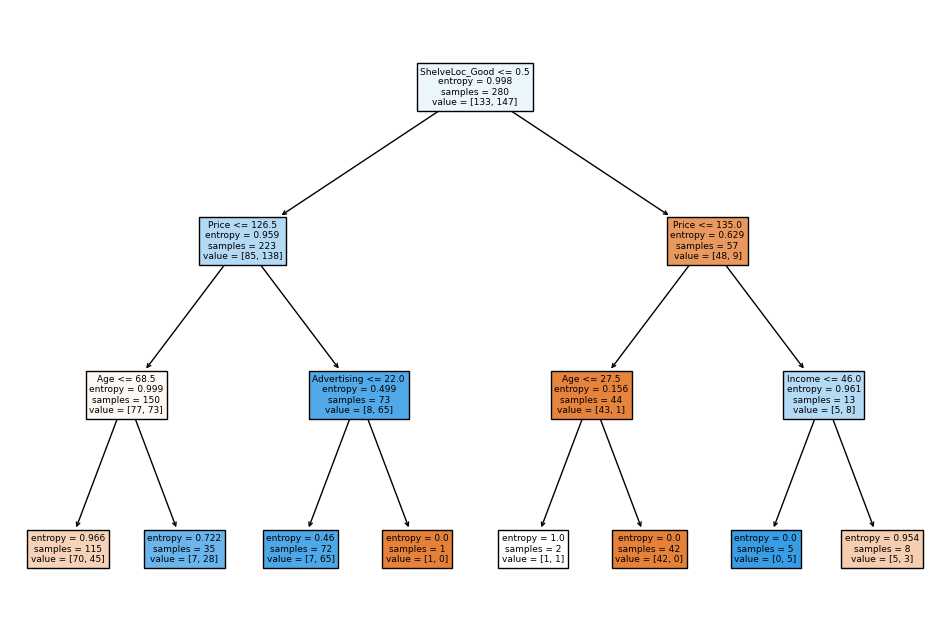

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_1 is your decision tree model and car_names is derived from a DataFrame
# Convert car_names from pandas.Index or any other format to a list
car_names_list = car_names.tolist()  # Convert to list if car_names is a pandas.Index

plt.figure(figsize=(12, 8))
plot_tree(dt_1, filled=True, feature_names=car_names_list)
plt.show()  # Ensure to call plt.show() to display the figure


In [48]:
print(export_text(dt_1, feature_names=car_names_list, show_weights=True))

|--- ShelveLoc_Good <= 0.50
|   |--- Price <= 126.50
|   |   |--- Age <= 68.50
|   |   |   |--- weights: [70.00, 45.00] class: high
|   |   |--- Age >  68.50
|   |   |   |--- weights: [7.00, 28.00] class: low
|   |--- Price >  126.50
|   |   |--- Advertising <= 22.00
|   |   |   |--- weights: [7.00, 65.00] class: low
|   |   |--- Advertising >  22.00
|   |   |   |--- weights: [1.00, 0.00] class: high
|--- ShelveLoc_Good >  0.50
|   |--- Price <= 135.00
|   |   |--- Age <= 27.50
|   |   |   |--- weights: [1.00, 1.00] class: high
|   |   |--- Age >  27.50
|   |   |   |--- weights: [42.00, 0.00] class: high
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [0.00, 5.00] class: low
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 3.00] class: high



In [49]:
# Make prediction
dt_1_pred = dt_1.predict(X_test)

In [50]:
accuracy_score(y_test, dt_1_pred)
confusion_matrix(y_test, dt_1_pred)

0.7333333333333333

array([[55, 11],
       [21, 33]])

In [51]:
pd.crosstab(y_test, dt_1_pred, rownames=['True'], colnames=['Predicted'])#, margins=True)

Predicted,high,low
True,,
low,21,33
high,55,11


8. Next we fit a tree without specifying stopping criteria.<br>
By default, the tree will grown until there is no more information gain.

In [52]:
dt_full = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
dt_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<Figure size 1200x800 with 0 Axes>

[Text(0.7163722826086957, 0.9615384615384616, 'ShelveLoc_Good <= 0.5\nentropy = 0.998\nsamples = 280\nvalue = [133, 147]'),
 Text(0.5631793478260869, 0.8846153846153846, 'Price <= 126.5\nentropy = 0.959\nsamples = 223\nvalue = [85, 138]'),
 Text(0.38722826086956524, 0.8076923076923077, 'Age <= 68.5\nentropy = 0.999\nsamples = 150\nvalue = [77, 73]'),
 Text(0.27445652173913043, 0.7307692307692307, 'Advertising <= 10.5\nentropy = 0.966\nsamples = 115\nvalue = [70, 45]'),
 Text(0.1358695652173913, 0.6538461538461539, 'Price <= 102.0\nentropy = 1.0\nsamples = 85\nvalue = [43, 42]'),
 Text(0.043478260869565216, 0.5769230769230769, 'Income <= 27.0\nentropy = 0.821\nsamples = 39\nvalue = [29, 10]'),
 Text(0.021739130434782608, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.06521739130434782, 0.5, 'Urban_Yes <= 0.5\nentropy = 0.711\nsamples = 36\nvalue = [29, 7]'),
 Text(0.043478260869565216, 0.4230769230769231, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.086956521739

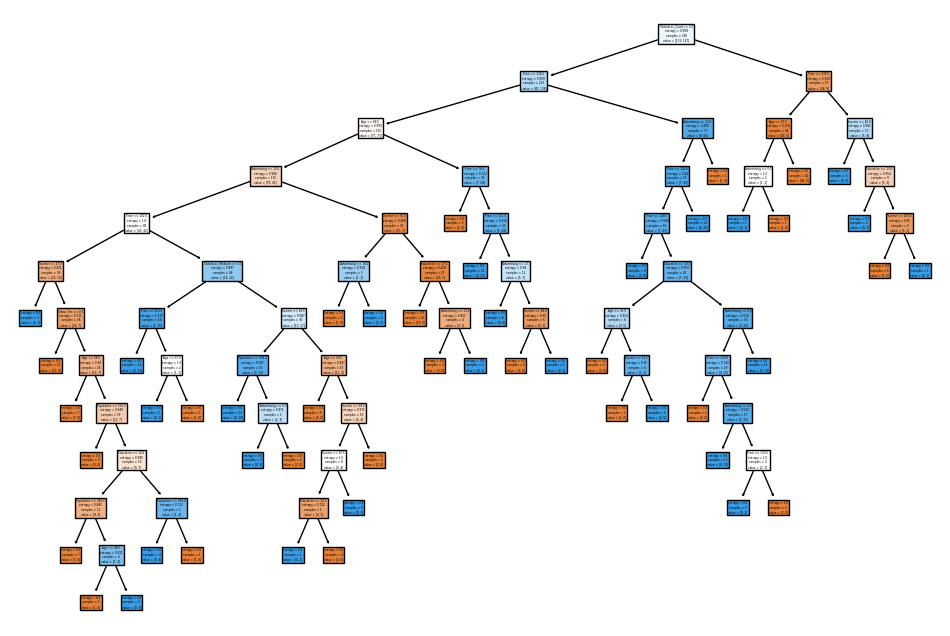

In [55]:
# Assuming dt_1 is your decision tree model and car_names is derived from a DataFrame
# Convert car_names from pandas.Index or any other format to a list
car_names_list = car_names.tolist()  # Convert to list if car_names is a pandas.Index

plt.figure(figsize=(12, 8))
plot_tree(dt_full, filled=True, feature_names=car_names_list)
plt.show()  # Ensure to call plt.show() to display the figure


In [56]:
dt_full_pred = dt_full.predict(X_test)
accuracy_score(y_test, dt_full_pred)
confusion_matrix(y_test, dt_full_pred)
# You can see the overfitting problem. The error rate does not decrease with bigger tree.

0.6916666666666667

array([[45, 21],
       [16, 38]])

9. Bagging, random forest and boosting

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

9.1 Bagging

In [58]:
# Bagging is the special case of random forest: it uses all variables to grow trees
dt_bag = RandomForestClassifier(n_estimators=500, max_features=None, random_state=0)

# n_estimators default is 100. We can increase it.
# max_features default is to use all variables

In [60]:
dt_bag.fit(X_train, y_train)

dt_bag_pred = dt_bag.predict(X_test)

accuracy_score(y_test, dt_bag_pred)
confusion_matrix(y_test, dt_bag_pred)
# You can try increase n_estimator to 500.

RandomForestClassifier(max_features=None, n_estimators=500, random_state=0)

0.75

array([[48, 18],
       [12, 42]])

9.2 Random forest

In [63]:
dt_rf = RandomForestClassifier(n_estimators=500, max_features = 4, random_state=0)
# max_features is set to sqrt(p), about 4.

In [64]:
dt_rf.fit(X_train, y_train)

dt_rf_pred = dt_rf.predict(X_test)

accuracy_score(y_test, dt_rf_pred)
confusion_matrix(y_test, dt_rf_pred)

RandomForestClassifier(max_features=4, n_estimators=500, random_state=0)

0.7583333333333333

array([[49, 17],
       [12, 42]])

9.4 We cannot get an interpretable tree from ensemble methods, but we can figure out the importance of each variable in classification.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x1666198d0>,
 [Text(0, 0, 'Urban_Yes'),
  Text(0, 1, 'US_Yes'),
  Text(0, 2, 'ShelveLoc_Medium'),
  Text(0, 3, 'Education'),
  Text(0, 4, 'Advertising'),
  Text(0, 5, 'Population'),
  Text(0, 6, 'ShelveLoc_Good'),
  Text(0, 7, 'Income'),
  Text(0, 8, 'Age'),
  Text(0, 9, 'Price')])

Text(0.5, 0, 'Importance Score')

Text(0, 0.5, 'Feature')

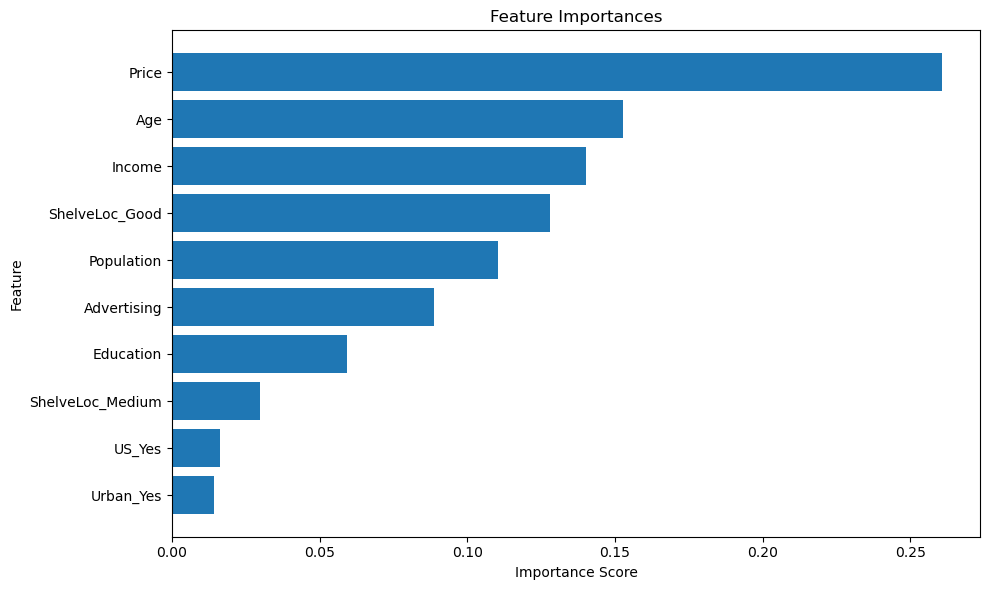

In [65]:
feature_importances = dt_rf.feature_importances_
# This is a numpy array

# Sort feature importances in descending order
sort_index = np.argsort(feature_importances)
# sort_index = sort_index[::-1]
# argsort() returns the index position that the element would have 
# if the array were sorted in ascending order.
# We can use it to select feature importance and 

# Plot horizontal feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), feature_importances[sort_index], align="center")
plt.yticks(range(X.shape[1]), np.array(X.columns)[sort_index])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

9.3 Boosting

In [66]:
dt_gb = GradientBoostingClassifier(n_estimators=100, learning_rate =0.001,
max_depth=3, random_state=0)
# B = 100, lambda = 0.001, d = 3

In [67]:
dt_gb = GradientBoostingClassifier(n_estimators=1000, learning_rate =0.001,
max_depth=3, random_state=0)
# B = 1000, lambda = 0.001, d = 1

In [68]:
dt_gb = GradientBoostingClassifier(n_estimators=5000, learning_rate =0.001,
max_depth=3, random_state=0)
# B = 5000, lambda = 0.001, d = 1
# Too large B may lead to overfitting

In [69]:
dt_gb.fit(X_train, y_train)
dt_gb_pred = dt_gb.predict(X_test)
accuracy_score(y_test, dt_gb_pred)
confusion_matrix(y_test, dt_gb_pred)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=5000,
                           random_state=0)

0.7833333333333333

array([[51, 15],
       [11, 43]])